## IMPORTING LIBRARYS

In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os

In [85]:
percentege_test_size = 0.2
undersampling_size = -1 # -1 para não fazer undersampling

# fig preprocessing
width = 100
height = 100
color_mode = 'rgba' # rgb, grayscale, rgba
# fig preprocessing

directory='./data/anime_characters' 
#directory='./data/animals' 

### LOADING DATASET

In [86]:
targets = [x[0].replace(directory,'') for x in os.walk(directory)]

targets = targets[1:len(targets)] # removes the first one from the list cuz its itself

dados = []
word='\ ' 
word=word.rstrip()
for classe in targets:
    imagens = os.listdir(directory+classe)
    i = 0
    for img in imagens:
        i+=1
        
        if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
            dados.append([directory+classe+'/'+img,classe.replace(word,'')])
        
        if(i == undersampling_size and undersampling_size != -1):
            break

dados = np.array(dados)
np.random.shuffle(dados)
            
df_dados = pd.DataFrame(dados,columns=['image','target'])

df_dados

,image,target
0,./data/anime_characters\saitama/saitama76.jpg,saitama
1,./data/anime_characters\goku/Goku53.jpg,goku
2,./data/anime_characters\killua/Killua31.jpg,killua
3,./data/anime_characters\killua/Killua1.jpg,killua
4,./data/anime_characters\light yagami/Light Yag...,light yagami
...,...,...
695,./data/anime_characters\naruto/Naruto66.jpg,naruto
696,./data/anime_characters\saitama/saitama7.jpg,saitama
697,./data/anime_characters\naruto/Naruto90.jpg,naruto
698,./data/anime_characters\goku/Goku90.jpg,goku


## PREPARING DATA

In [87]:
def embedding(img_path,width,height,color_mode):
    
    img = image.load_img(img_path, target_size=(width, height),color_mode= color_mode)
    embed = image.img_to_array(img)
    
    shape_entrada = width*height*1

    if(color_mode == 'rgb'):
        shape_entrada = width*height*3

    if(color_mode == 'rgba'):
        shape_entrada = width*height*4
    
    return embed.reshape(shape_entrada)

In [88]:
target = df_dados['target'].array

array_features = []
for x in dados:
    array_features.append(embedding(x[0],width,height,color_mode))

scaler = preprocessing.StandardScaler()

array_features = scaler.fit_transform(array_features)

df_features = pd.DataFrame(array_features)

df_features

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,-1.462451,-1.183481,-0.917614,0.0,-1.500203,-1.227414,-0.953379,0.0,-1.505978,-1.231122,...,0.338428,0.0,-0.150873,-0.109382,-0.036018,0.0,-0.611824,-0.551315,-0.476721,0.0
1,1.128870,1.115349,1.090497,0.0,1.107622,1.093804,1.074797,0.0,1.071742,1.057704,...,1.183367,0.0,1.089693,1.146356,1.175626,0.0,1.091217,1.150018,1.170504,0.0
2,0.820379,0.797538,0.686750,0.0,0.799611,0.775829,0.671285,0.0,0.794457,0.771601,...,0.887639,0.0,0.872050,0.929849,0.880617,0.0,0.895964,0.954960,0.897715,0.0
3,-0.845470,-0.664391,-0.056995,0.0,-0.904716,-0.697456,-0.135738,0.0,-0.900060,-0.690705,...,0.465169,0.0,0.360588,0.204552,0.522392,0.0,0.386136,0.207241,0.478040,0.0
4,-1.472734,-1.564854,-1.597610,0.0,-1.479669,-1.577187,-1.601122,0.0,-1.475169,-1.570207,...,-0.474826,0.0,-0.542631,-0.823854,-0.710324,0.0,-0.796230,-1.082305,-0.959347,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.974625,0.776351,0.559251,0.0,0.963883,0.765230,0.554479,0.0,0.958774,0.761004,...,0.655280,0.0,0.915579,0.767470,0.648824,0.0,0.906812,0.759903,0.635418,0.0
696,-0.485564,-0.653797,-0.428868,0.0,-1.448868,-1.577187,-1.399366,0.0,-1.505978,-1.549014,...,-1.509876,0.0,-1.685258,-1.614103,-1.511063,0.0,-1.674869,-1.613294,-1.504925,0.0
697,-1.236225,-1.321199,-1.055738,0.0,-1.243528,-1.333406,-1.059567,0.0,-1.249233,-1.347682,...,-0.823363,0.0,1.078811,0.702518,0.100950,0.0,0.776643,0.380625,-0.329835,0.0
698,-1.339055,-0.399548,0.155503,0.0,-1.500203,-0.368881,0.469530,0.0,-1.505978,-0.341023,...,0.158879,0.0,0.371470,1.124705,0.870081,0.0,0.798338,1.106671,0.960666,0.0


## REDUCING DIMENSIALITY

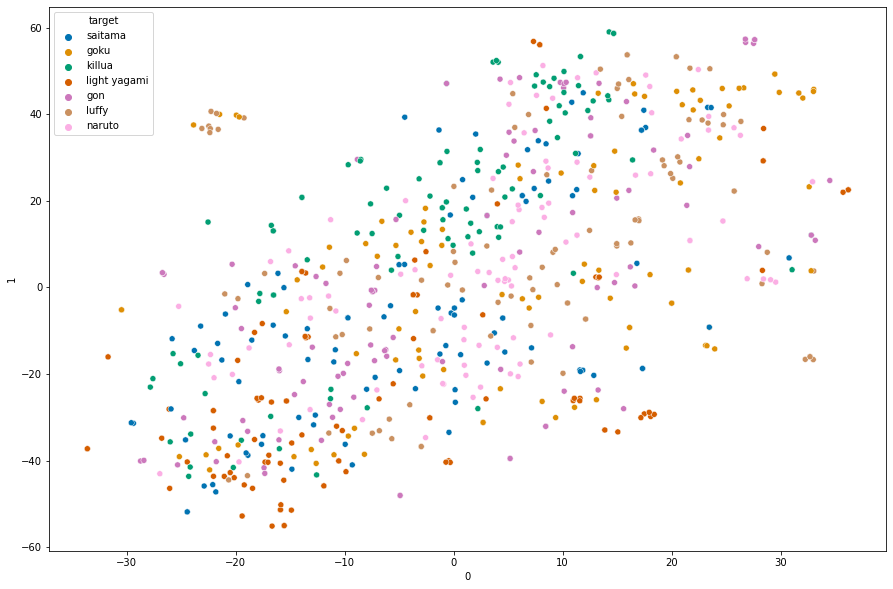

In [89]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15)
array_red = model.fit_transform(df_features) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = target

plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="colorblind")

plt.show()

## TRAINING AND VALIDATING MODEL

In [90]:
def getModel():
    return RandomForestClassifier(n_jobs=6)
    # return LogisticRegression(n_jobs=6, solver='sag', multi_class='ovr')
    # return KNeighborsClassifier(n_neighbors=3,n_jobs=6)
    # return XGBClassifier()
    # return SGDClassifier(n_jobs=6,early_stopping=True,validation_fraction=0.05)

In [91]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_features.values,target,test_size=percentege_test_size)

model = getModel().fit(X_treino, y_treino)

score = model.score(X_teste, y_teste)

score

0.5214285714285715

## CROSS VALIDATING

In [92]:
scores = cross_val_score(getModel(),df_features.values,target,cv=10)

np.mean(scores)

0.5728571428571427

## DISPLAYING CONFUSION MATRIX

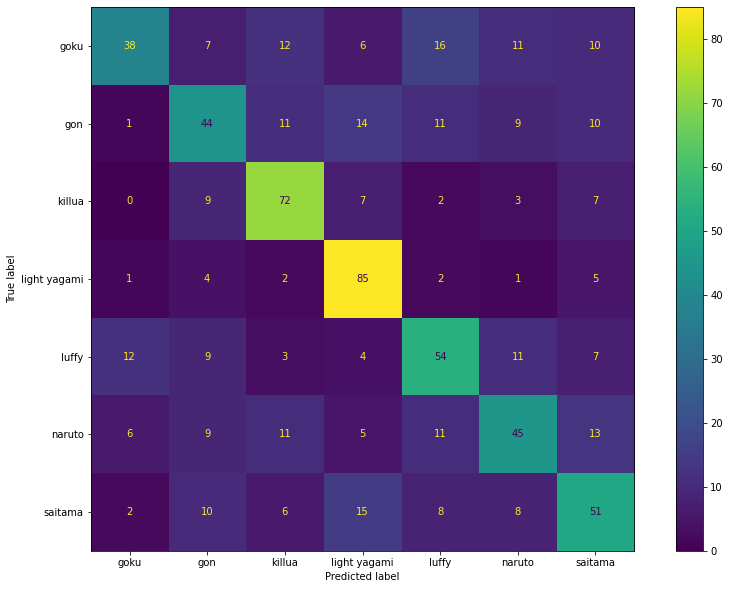

In [93]:
predicoes = cross_val_predict(getModel(),df_features.values,target,cv=10)

cm = confusion_matrix(target, predicoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()